# Air Quality Benefits of Emissions Testing Capstone: Data Analysis

## ----Project Context (Re-Stated from Part I) ----

In 2017 The Pennsylvania (PA) legislature was deciding whether to continue emissions testing in the state, and which test(s) to use if emissions testing was to continue.

As part of a capstone project, I was part of a team that had a goal of using data to determine benefits of emissions testing and inform public policy descisions in PA. The data at our disposal consisted of emissions test results from Colorado over the span of 2010-2016.

With the provided data, the team sought to investigate the following questions related to the overall project goal:

- How can the emissions inspection results/data inform us about actual vehicle emissions over time?
- How does a particular model year’s emissions change over time?
- What amount of emissions are we preventing from entering the environment by testing?

### Results

#### --- Question 1: How can the emissions inspection results/data inform us about actual vehicle emissions over time? --

#### --- How does a particular model year’s emissions change over time?

#### --- What amount of emissions are we preventing from entering the environment by testing?


### Data Privacy Note
Please note that, for privacy reasons, the datasets originally used are no longer published for use.

## ----Data Context----

Before starting analysis to answer the team's main questions, there was a desire to create a clean data set from the original Colorado data. The clean data set would include only relevant columns, and take out outliers or discrepancies found in the original data.

The original datasets the team used were from Colorado emissions testing results. Data from 2010-2016 was available to the team. Each testing year's data held 500,000 - 1,000,000 rows and 250+ columns, with each row representing a unique inspection. These rows included data about the vehicle such as make/model/year/engine data, as well as test and inspection results.

In Colorado, generally speaking, two emissions tests were run on vehicles:

1. An OBD test. This test checks for conditions that waste fuel and shorten engine life, such as a loose gas cap.
3. An IM240 test. This test puts a vehicle on a treadmill and simulates different driving conditions. A sensor put at the tailpipe during this test measures actual emissions of carbon monoxide (CO), hydrocarbons (HC), and nitrogen oxides (NOx) from the vehicle.

The above tests were conducted according to Colorado's testing regimen. For light duty vehicles, the following rules defined testing requirements:

- Vehicles within their first 7 model years are exempt from testing
- Vehicles Model Year 1982 and newer must be inspected every other year
- Vehicles Model Year 1981 and older and diesel Vehicles Model Year 2003 and older must be inspected every year

### Data Dictionary

Below is a list of column names in this dataset, and a short description of their meanings:
- V_VIN: Vehicle VIN
- V_DATE: Inspection Date
- V_MAKE: Vehicle Make
- V_MODEL: Vehicle Model
- V_VEH_YEAR: Vehicle Year
- V_ODOMETER: Vehicle odometer reading
- V_CO: Carbon monoxide emissions reading
- V_HC: Hydrocarbon emissions reading
- V_NOX: NOx emissions reading
- V_CO_STD: EPA CO maximum allowable emissions limit
- V_HC_STD: EPA HC maximum allowable emissions limit
- V_NOX_STD: EPA NOx maxium allowable emissions limit
- V_OBD_RES: OBD test result
- V_EM_RES: IM240 test result
- V_RESULT: Overall inspection result. If a vehicle fails its OBD or IM240 or other inspection aspects, the entire inspection is a fail
- V_TRANS: Vehicle transmission type
- V_CYLINDERS: Number of cylinders the car's engine has
- V_DISP: Engine size (Liters)
- V_DRIVE: Vehicle drive type, eg all wheel drive


### Import Python Libraries


In [224]:
#analysis and viz imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Data_2010_IM240_clean = pd.read_csv("./Data_2010_IM240_clean.csv")
Data_2011_IM240_clean = pd.read_csv("./Data_2011_IM240_clean.csv")
Data_2012_IM240_clean = pd.read_csv("./Data_2012_IM240_clean.csv")
Data_2013_IM240_clean = pd.read_csv("./Data_2013_IM240_clean.csv")
Data_2014_IM240_clean = pd.read_csv("./Data_2014_IM240_clean.csv")
Data_2015_IM240_clean = pd.read_csv("./Data_2015_IM240_clean.csv")
Data_2016_IM240_clean = pd.read_csv("./Data_2016_IM240_clean.csv")

Data_2010_OBD_clean = pd.read_csv("./Data_2010_OBD_clean.csv")
Data_2011_OBD_clean = pd.read_csv("./Data_2011_OBD_clean.csv")
Data_2012_OBD_clean = pd.read_csv("./Data_2012_OBD_clean.csv")
Data_2013_OBD_clean = pd.read_csv("./Data_2013_OBD_clean.csv")
Data_2014_OBD_clean = pd.read_csv("./Data_2014_OBD_clean.csv")
Data_2015_OBD_clean = pd.read_csv("./Data_2015_OBD_clean.csv")
Data_2016_OBD_clean = pd.read_csv("./Data_2016_OBD_clean.csv")

Data_OBD_and_IM240_clean_2010 = pd.read_csv("./OBD_and_IM240_clean_2010_df.csv")
Data_OBD_and_IM240_clean_2011 = pd.read_csv("./OBD_and_IM240_clean_2011_df.csv")
Data_OBD_and_IM240_clean_2013 = pd.read_csv("./OBD_and_IM240_clean_2013_df.csv")
Data_OBD_and_IM240_clean_2014 = pd.read_csv("./OBD_and_IM240_clean_2014_df.csv")
Data_OBD_and_IM240_clean_2015 = pd.read_csv("./OBD_and_IM240_clean_2015_df.csv")
Data_OBD_and_IM240_clean_2016 = pd.read_csv("./OBD_and_IM240_clean_2016_df.csv")

C:\Users\allan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Mini Vin Pass/Fail Dataset Generation

With the above 3 datasets created, miniVIN data could be grouped and analyzed. This would help analyze the group's questions regarding a model year's emissions over time, in the lens of each type of test.

### ---- IM240 PASS RATE ----

To start, I grouped the IM240 data by miniVIN and IM240 emissions result. I then created several aggregate columns that displayed the count of vehicles of a particular miniVIN that were tested and the number that passed the test.

In [470]:
mini_vin_IM240_pass_rate_2010 = Data_OBD_and_IM240_clean_2010[["mini_vin", "V_EM_RES"]].groupby(by="mini_vin", axis=0).agg({"V_EM_RES": ["count","sum"]})

Next, I renamed and re-formatted column names for clarity.

In [466]:
mini_vin_IM240_pass_rate_2010.columns=mini_vin_IM240_pass_rate_2010.columns.droplevel(0)

In [467]:
mini_vin_IM240_pass_rate_2010.rename(columns={"count": "IM240_vehicles_tested", "sum":"IM240_passed"}, inplace=True)

Finally, I created a pass rate for each miniVIN by dividing the number of vehicles tested by the total number tested.

In [468]:
mini_vin_IM240_pass_rate_2010["IM240_pass_rate"] = 100*mini_vin_IM240_pass_rate_2010["IM240_passed"]/(mini_vin_IM240_pass_rate_2010["IM240_vehicles_tested"])

In [469]:
len(mini_vin_IM240_pass_rate_2010)

9702

### ---- OBD PASS RATE ----

Below, an OBD pass rate by miniVIN was created using the same steps as above for the IM240 data set.

In [377]:
OBD_only_clean_df = Data_2012_OBD_clean[["mini_vin", "V_OBD_RES"]].groupby(by="mini_vin", axis=0).agg({"V_OBD_RES": ["count","sum"]})

In [378]:
OBD_only_clean_df.columns=OBD_only_clean_df.columns.droplevel(0)

In [379]:
OBD_only_clean_df.rename(columns={"count": "OBD_vehicles_tested", "sum":"OBD_passed"}, inplace=True)

In [380]:
OBD_only_clean_df["OBD_pass_rate"] = 100*OBD_only_clean_df["OBD_passed"]/(OBD_only_clean_df["OBD_vehicles_tested"])

In [381]:
len(OBD_only_clean_df)

8461

### ---- IM240 AND OBD PASS RATE ----

Below, an overall pass rate by miniVIN was created using the same steps as above. This dataset only contains instances where a vechile got clear pass/fail results on both emissions tests.

In [472]:
OBD_and_IM240_clean_df = Data_OBD_and_IM240_clean_2014[["mini_vin", "V_RESULT"]].groupby(by="mini_vin", axis=0).agg({"V_RESULT": ["count","sum"]})

In [473]:
OBD_and_IM240_clean_df.columns=OBD_and_IM240_clean_df.columns.droplevel(0)

In [474]:
OBD_and_IM240_clean_df.rename(columns={"count": "Both_clean_vehicles_tested", "sum":"Both_passed"}, inplace=True)

In [475]:
OBD_and_IM240_clean_df["OBD_and_IM240_pass_rate"] = 100*OBD_and_IM240_clean_df["Both_passed"]/(OBD_and_IM240_clean_df["Both_clean_vehicles_tested"])

In [476]:
len(OBD_and_IM240_clean_df)

9702

## Emissions, Make and Model Data Generation

In this section, data was created to summarize the total vehicles with a given make, model, and year in separate tables. This provided insights into the distribution of vehicles in the state and allow us to create average emissions figures based on total emissions and total vehicles of a given type.

This was done for each emission type separately, after which the data was aggregated.

For each pollutant, the following steps were followed:
- a subset of the overall dataset was taken with only the vehicle make, model, year and relevant emission total included
- this dataset was grouped by miniVIN, model and make
- this dataset also included aggregate columns to show emissions summary statistics for each miniVIN/make/model combination 
- finally, the resultant dataframe was formatted so that column labels could be read more easily

In [387]:
# function to get the first and third quartile emissions value for a given miniVIN/make/model vehicle
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [388]:
CO_summary = Data_OBD_and_IM240_clean_2014[["mini_vin","V_MAKE","V_MODEL", "V_CO"]].groupby(by=["mini_vin", "V_MODEL", "V_MAKE"], axis=0).agg({"mini_vin":["count"],"V_CO": ["min",percentile(25),"median","mean",percentile(75),"max"]})
CO_summary.columns=CO_summary.columns.droplevel(0)
CO_summary.rename(columns={"count": "mini_vin_count", "min":"V_CO_min", "percentile_25": "V_CO_1st_qua.", "median":"V_CO_median","mean":"V_CO_mean","percentile_75":"V_CO_3rd_qua.","max":"V_CO_max"}, inplace=True)
CO_summary.reset_index(inplace=True)

In [389]:
HC_summary = Data_OBD_and_IM240_clean_2014[["mini_vin","V_MAKE","V_MODEL", "V_HC"]].groupby(by=["mini_vin", "V_MODEL", "V_MAKE"], axis=0).agg({"V_HC": ["min",percentile(25),"median","mean",percentile(75),"max"]})
HC_summary.columns=HC_summary.columns.droplevel(0)
HC_summary.rename(columns={"min":"V_HC_min", "percentile_25": "V_HC_1st_qua.", "median":"V_HC_median","mean":"V_HC_mean","percentile_75":"V_HC_3rd_qua.","max":"V_HC_max"}, inplace=True)
HC_summary.reset_index(inplace=True)

In [390]:
NOX_summary = Data_OBD_and_IM240_clean_2014[["mini_vin","V_MAKE","V_MODEL", "V_NOX"]].groupby(by=["mini_vin", "V_MODEL", "V_MAKE"], axis=0).agg({"V_NOX": ["min",percentile(25),"median","mean",percentile(75),"max"]})
NOX_summary.columns=NOX_summary.columns.droplevel(0)
NOX_summary.rename(columns={"min":"V_NOX_min", "percentile_25": "V_NOX_1st_qua.", "median":"V_NOX_median","mean":"V_NOX_mean","percentile_75":"V_NOX_3rd_qua.","max":"V_NOX_max"}, inplace=True)
NOX_summary.reset_index(inplace=True)

After statistics were generated for each pollutant type, the above tables were joined on miniVIN, make, and model to create one summary table.

In [391]:
summary_stats_2012 = CO_summary.merge(HC_summary, how='inner', left_on=["mini_vin","V_MAKE","V_MODEL"],right_on=["mini_vin","V_MAKE","V_MODEL"]).merge(NOX_summary, how='inner', left_on=["mini_vin","V_MAKE","V_MODEL"],right_on=["mini_vin","V_MAKE","V_MODEL"])

## ----Pass Rate By Model Year----

In [196]:
def pass_rate_by_model_year(df,year,test,metric):
    df = df[["V_VEH_YEAR", metric]].groupby(by="V_VEH_YEAR", axis=0).agg({metric: ["count","sum"]})
    df.columns=df.columns.droplevel(0)
    df.rename(columns={"count": "Model_year_"+test+"_tests_conducted", "sum":"Model_year_"+test+"_passed_tests"}, inplace=True)
    df["Model_Year_"+test+"_Pass_Rate"] = 100*df["Model_year_"+test+"_passed_tests"]/df["Model_year_"+test+"_tests_conducted"]
    df["testing_year"]=year
    return df

In [251]:
# pass_rate_by_model_year_OBD_df_2010=pass_rate_by_model_year(Data_2010_OBD_clean,2010,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2011=pass_rate_by_model_year(Data_2011_OBD_clean,2011,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2012=pass_rate_by_model_year(Data_2012_OBD_clean,2012,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2013=pass_rate_by_model_year(Data_2013_OBD_clean,2013,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2014=pass_rate_by_model_year(Data_2014_OBD_clean,2014,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2015=pass_rate_by_model_year(Data_2015_OBD_clean,2015,"OBD","V_OBD_RES")
# pass_rate_by_model_year_OBD_df_2016=pass_rate_by_model_year(Data_2016_OBD_clean,2016,"OBD","V_OBD_RES")
# pass_rate_by_model_year_passed_obd_only_df = [pass_rate_by_model_year_OBD_df_2010,pass_rate_by_model_year_OBD_df_2011,pass_rate_by_model_year_OBD_df_2012,pass_rate_by_model_year_OBD_df_2013,pass_rate_by_model_year_OBD_df_2014,pass_rate_by_model_year_OBD_df_2015,pass_rate_by_model_year_OBD_df_2016]

In [252]:
# pass_rate_by_model_year_passed_obd_only_df=pd.concat(pass_rate_by_model_year_passed_obd_only_df)

In [253]:
pass_rate_by_model_year_passed_obd_only_df.to_csv('./pass_rate_by_model_year_passed_obd_only_df.csv')

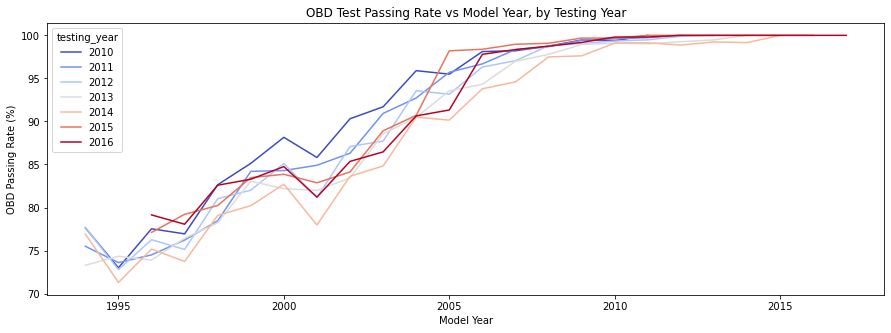

In [77]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=pass_rate_by_model_year_passed_obd_only_df, x='V_VEH_YEAR', y='Model_Year_OBD_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("OBD Passing Rate (%)")
plt.title("OBD Test Passing Rate vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_OBD_Pass.png')


In [243]:
# pass_rate_by_model_year_IM240_df_2010=pass_rate_by_model_year(Data_2010_IM240_clean,2010,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2011=pass_rate_by_model_year(Data_2011_IM240_clean,2011,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2012=pass_rate_by_model_year(Data_2012_IM240_clean,2012,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2013=pass_rate_by_model_year(Data_2013_IM240_clean,2013,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2014=pass_rate_by_model_year(Data_2014_IM240_clean,2014,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2015=pass_rate_by_model_year(Data_2015_IM240_clean,2015,"IM240","V_EM_RES")
# pass_rate_by_model_year_IM240_df_2016=pass_rate_by_model_year(Data_2016_IM240_clean,2016,"IM240","V_EM_RES")
# pass_rate_by_model_year_passed_IM240_only_df = [pass_rate_by_model_year_IM240_df_2010,pass_rate_by_model_year_IM240_df_2011,pass_rate_by_model_year_IM240_df_2012,pass_rate_by_model_year_IM240_df_2013,pass_rate_by_model_year_IM240_df_2014,pass_rate_by_model_year_IM240_df_2015,pass_rate_by_model_year_IM240_df_2016]

In [244]:
# pass_rate_by_model_year_passed_IM240_only_df=pd.concat(pass_rate_by_model_year_passed_IM240_only_df)
# pass_rate_by_model_year_passed_IM240_only_df.to_csv('./pass_rate_by_model_year_passed_IM240_only_df.csv')

In [245]:
pass_rate_by_model_year_passed_IM240_only_df=pd.read_csv("./pass_rate_by_model_year_passed_IM240_only_df.csv")

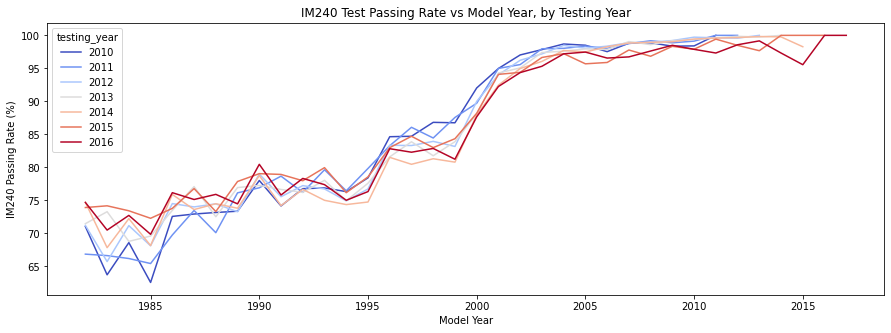

In [250]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=pass_rate_by_model_year_passed_IM240_only_df, x='V_VEH_YEAR', y='Model_Year_IM240_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("IM240 Passing Rate (%)")
plt.title("IM240 Test Passing Rate vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_IM240_Pass.png')


In [220]:
def pass_rate_by_model_year_both_tests(df,year,test):
    df["two_test_passed"]= (df["V_OBD_RES"]+df["V_EM_RES"]==2).astype(int)
    df = df[["V_VEH_YEAR", "two_test_passed"]].groupby(by="V_VEH_YEAR", axis=0).agg({"two_test_passed": ["count","sum"]})
    df.columns=df.columns.droplevel(0)
    df.rename(columns={"count": "Model_year_"+test+"_tests_conducted", "sum":"Model_year_"+test+"_passed_tests"}, inplace=True)
    df["Model_Year_"+test+"_Pass_Rate"] = 100*df["Model_year_"+test+"_passed_tests"]/df["Model_year_"+test+"_tests_conducted"]
    df["testing_year"]=year
    return df

In [246]:
# pass_rate_by_model_year_both_pass_df_2010=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2010,2010,"both_tests")
# pass_rate_by_model_year_both_pass_df_2011=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2011,2011,"both_tests")
# pass_rate_by_model_year_both_pass_df_2013=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2013,2013,"both_tests")
# pass_rate_by_model_year_both_pass_df_2014=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2014,2014,"both_tests")
# pass_rate_by_model_year_both_pass_df_2015=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2015,2015,"both_tests")
# pass_rate_by_model_year_both_pass_df_2016=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2016,2016,"both_tests")
# pass_rate_by_model_year_passed_both_tests_df = [pass_rate_by_model_year_both_pass_df_2010,pass_rate_by_model_year_both_pass_df_2011,pass_rate_by_model_year_both_pass_df_2013,pass_rate_by_model_year_both_pass_df_2014,pass_rate_by_model_year_both_pass_df_2015,pass_rate_by_model_year_both_pass_df_2016]
# pass_rate_by_model_year_passed_both_tests_df=pd.concat(pass_rate_by_model_year_passed_both_tests_df)

In [247]:
# pass_rate_by_model_year_passed_both_tests_df.to_csv('./pass_rate_by_model_year_passed_both_tests_df.csv')

In [248]:
pass_rate_by_model_year_passed_both_tests_df=pd.read_csv("./pass_rate_by_model_year_passed_both_tests_df.csv")

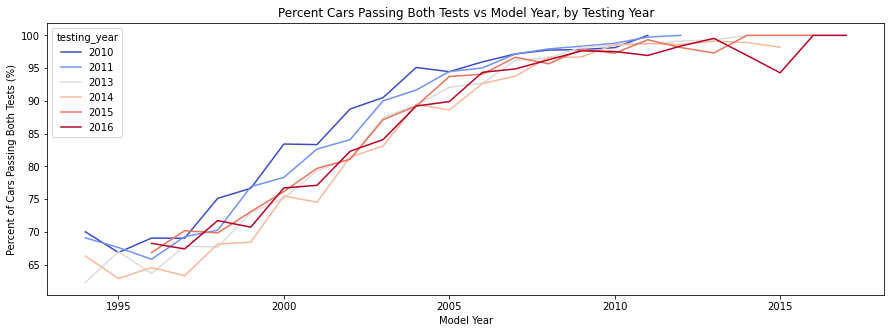

In [249]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=pass_rate_by_model_year_passed_both_tests_df, x='V_VEH_YEAR', y='Model_Year_both_tests_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("Percent of Cars Passing Both Tests (%)")
plt.title("Percent Cars Passing Both Tests vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_both_Pass.png')


In [189]:
def pass_rate_by_model_year_one_test(df,year,test):
    df["one_test_passed"]= (df["V_OBD_RES"]+df["V_EM_RES"]==1).astype(int)
    df = df[["V_VEH_YEAR", "one_test_passed"]].groupby(by="V_VEH_YEAR", axis=0).agg({"one_test_passed": ["count","sum"]})
    df.columns=df.columns.droplevel(0)
    df.rename(columns={"count": "Model_year_"+test+"_tests_conducted", "sum":"Model_year_"+test+"_passed_tests"}, inplace=True)
    df["Model_Year_"+test+"_Pass_Rate"] = 100*df["Model_year_"+test+"_passed_tests"]/df["Model_year_"+test+"_tests_conducted"]
    df["testing_year"]=year
    return df

In [190]:
pass_rate_by_model_year_one_pass_df_2010=pass_rate_by_model_year_one_test(Data_OBD_and_IM240_clean_2010,2010,"both_tests")
pass_rate_by_model_year_one_pass_df_2011=pass_rate_by_model_year_one_test(Data_OBD_and_IM240_clean_2011,2011,"both_tests")
pass_rate_by_model_year_one_pass_df_2013=pass_rate_by_model_year_one_test(Data_OBD_and_IM240_clean_2013,2013,"both_tests")
pass_rate_by_model_year_one_pass_df_2014=pass_rate_by_model_year_one_test(Data_OBD_and_IM240_clean_2014,2014,"both_tests")
pass_rate_by_model_year_one_pass_df_2015=pass_rate_by_model_year_one_test(Data_OBD_and_IM240_clean_2015,2015,"both_tests")
pass_rate_by_model_year_one_pass_df_2016=pass_rate_by_model_year_one_test(Data_OBD_and_IM240_clean_2016,2016,"both_tests")
both_clean_data_frames_one_test_passed = [pass_rate_by_model_year_one_pass_df_2010,pass_rate_by_model_year_one_pass_df_2011,pass_rate_by_model_year_one_pass_df_2013,pass_rate_by_model_year_one_pass_df_2014,pass_rate_by_model_year_one_pass_df_2015,pass_rate_by_model_year_one_pass_df_2016]
both_clean_data_frames_one_test_passed=pd.concat(both_clean_data_frames_one_test_passed)

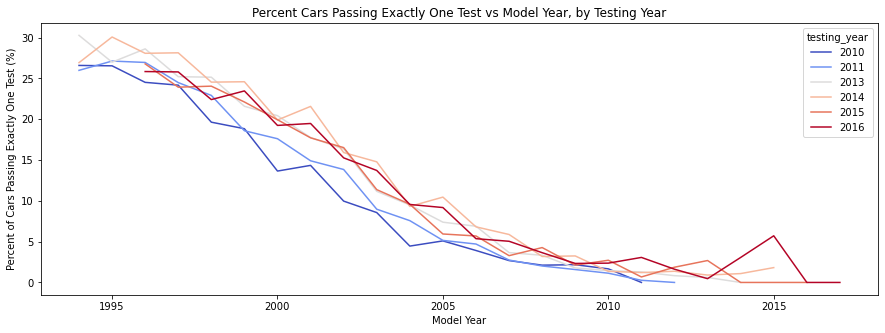

In [192]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=both_clean_data_frames_one_test_passed, x='V_VEH_YEAR', y='Model_Year_both_tests_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("Percent of Cars Passing Exactly One Test (%)")
plt.title("Percent Cars Passing Exactly One Test vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_both_Pass.png')


## ----Model Year Pollution Degradation----

In [79]:
def model_year_pollution_degradation(df,year):
    df = df.drop_duplicates(subset=["V_VIN"], keep="first")
    df = df[["V_VIN","V_VEH_YEAR","V_CO", "V_HC","V_NOX"]].groupby(by=["V_VEH_YEAR"], axis=0).agg(V_CO_mean=("V_CO", "mean"),V_HC_mean=("V_HC", "mean"),V_NOX_mean=("V_NOX", "mean"))
    df["testing_year"]=year
    df.reset_index()
    return df

In [80]:
# model_year_pollution_2010_df=model_year_pollution_degradation(Data_OBD_and_IM240_clean_2010,2010)
# model_year_pollution_2011_df=model_year_pollution_degradation(Data_OBD_and_IM240_clean_2011,2011)
# model_year_pollution_2013_df=model_year_pollution_degradation(Data_OBD_and_IM240_clean_2013,2012)
# model_year_pollution_2014_df=model_year_pollution_degradation(Data_OBD_and_IM240_clean_2014,2014)
# model_year_pollution_2015_df=model_year_pollution_degradation(Data_OBD_and_IM240_clean_2015,2015)
# model_year_pollution_2016_df=model_year_pollution_degradation(Data_OBD_and_IM240_clean_2016,2016)

In [269]:
# model_year_pollution_dfs = [model_year_pollution_2010_df,model_year_pollution_2011_df,model_year_pollution_2013_df,model_year_pollution_2014_df,model_year_pollution_2015_df,model_year_pollution_2016_df]
# model_year_pollution_dfs_merged=pd.concat(model_year_pollution_dfs)

In [256]:
# model_year_pollution_dfs_merged.to_csv("./model_year_pollution_dfs_merged.csv")

In [257]:
model_year_pollution_dfs_merged=pd.read_csv("./model_year_pollution_dfs_merged.csv")

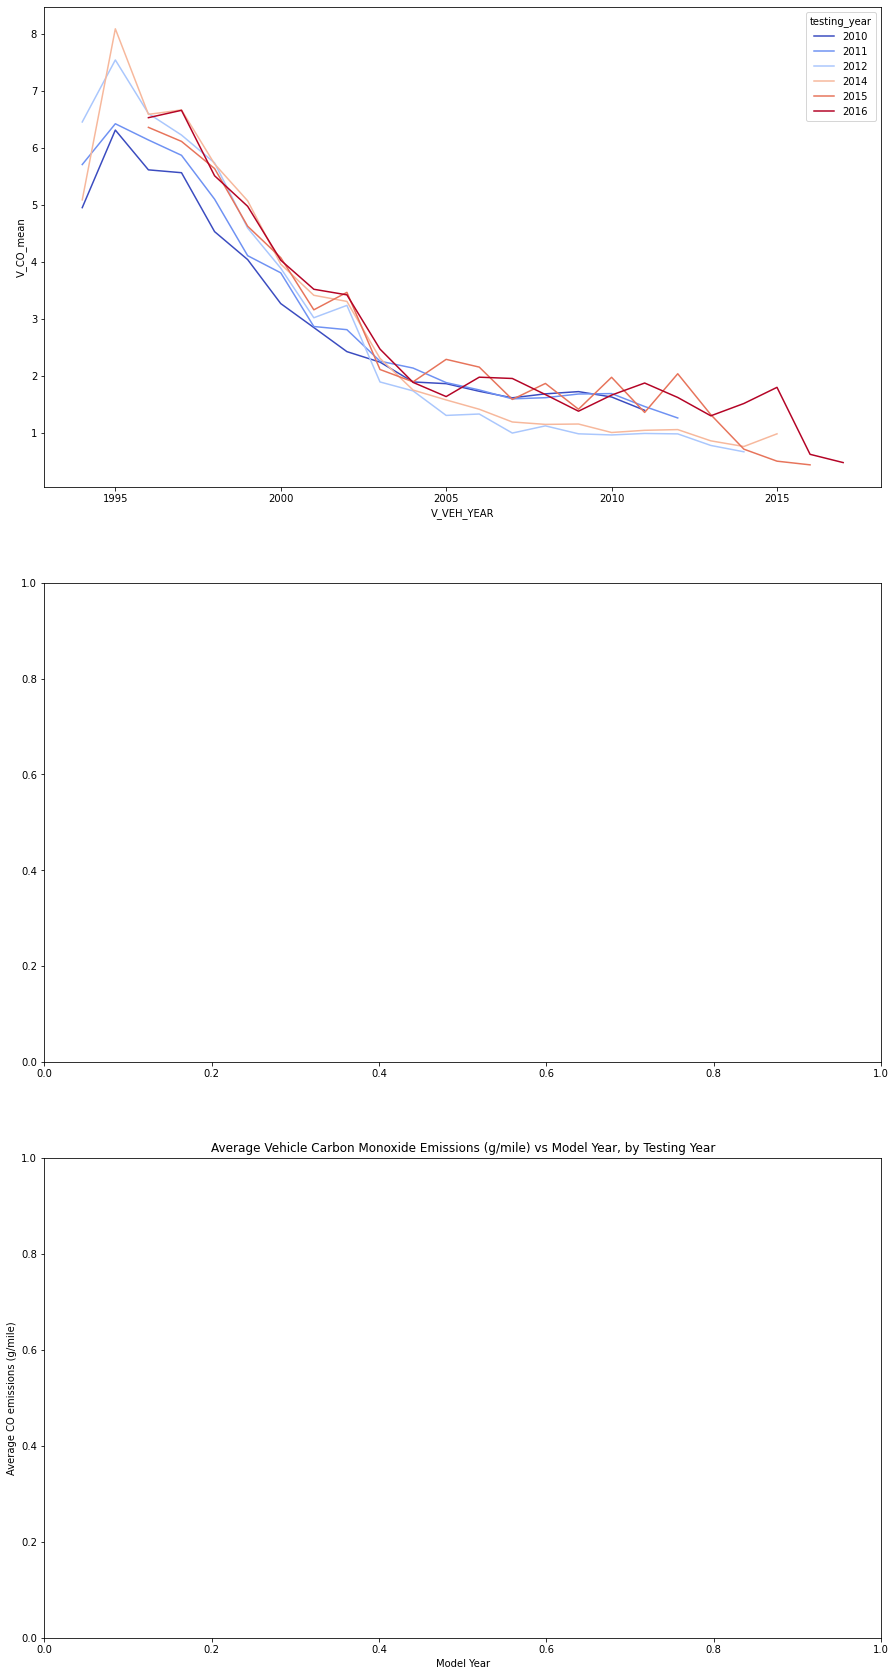

In [268]:
fig, ax = plt.subplots(3,1,figsize=(15, 30), facecolor="white")
sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_CO_mean', hue="testing_year", palette="coolwarm",ax=ax[0])
plt.xlabel("Model Year")
plt.ylabel("Average CO emissions (g/mile)")
plt.title("Average Vehicle Carbon Monoxide Emissions (g/mile) vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_CO_mean.png')


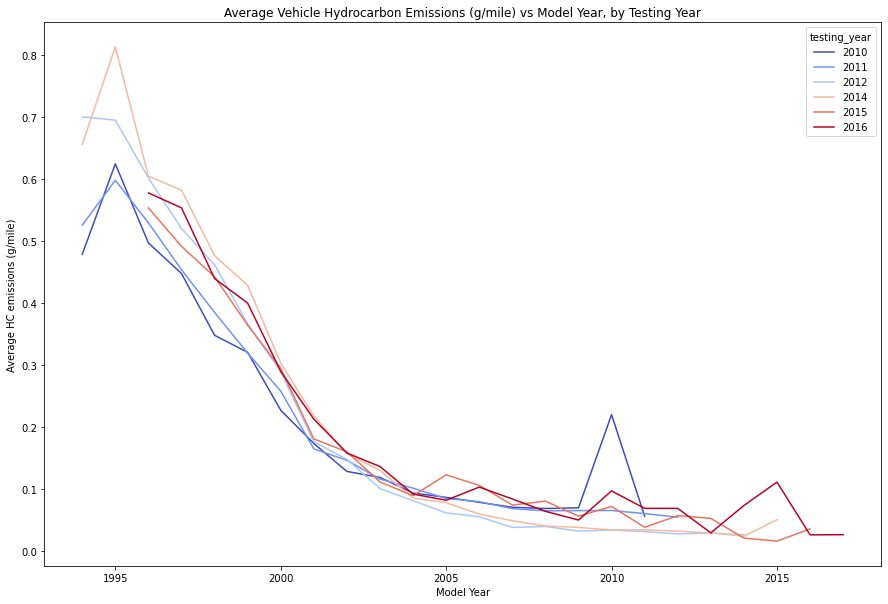

In [259]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor="white")
plt.xlabel("Model Year")
plt.ylabel("Average HC emissions (g/mile)")
plt.title("Average Vehicle Hydrocarbon Emissions (g/mile) vs Model Year, by Testing Year")
sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_HC_mean', hue="testing_year", palette="coolwarm")
plt.savefig('V_VEH_YEAR_vs_HC_mean.png')


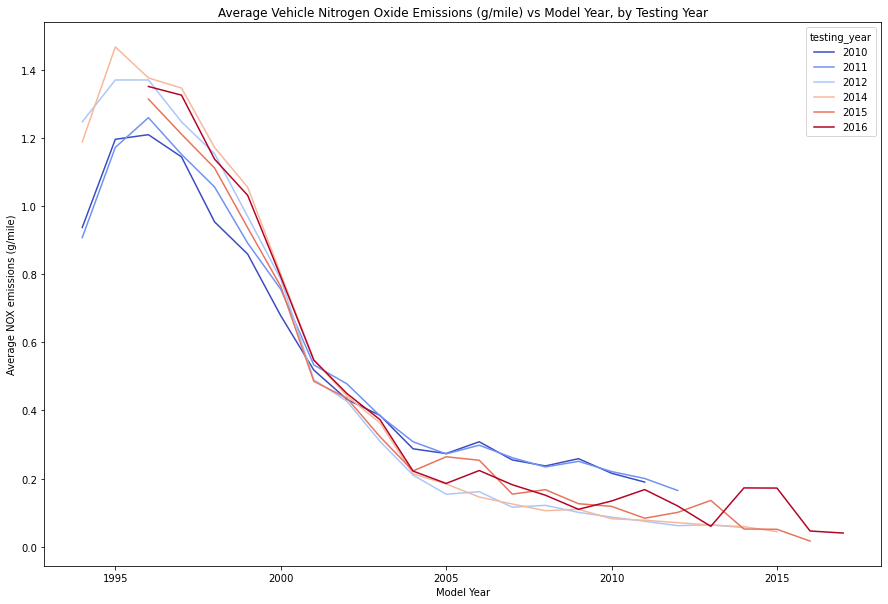

In [260]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor="white")
plt.xlabel("Model Year")
plt.ylabel("Average NOX emissions (g/mile)")
plt.title("Average Vehicle Nitrogen Oxide Emissions (g/mile) vs Model Year, by Testing Year")
sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_NOX_mean', hue="testing_year", palette="coolwarm")
plt.savefig('V_VEH_YEAR_vs_NOX_mean.png')


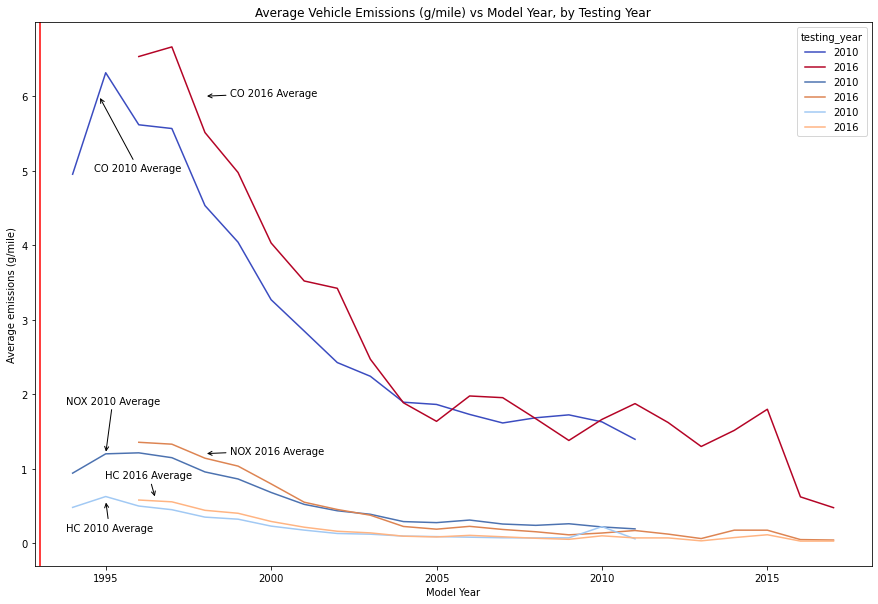

In [261]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor="white")
sns.lineplot(data=model_year_pollution_dfs_merged[model_year_pollution_dfs_merged["testing_year"].isin([2010,2016])], x='V_VEH_YEAR', y='V_CO_mean', hue="testing_year", palette="coolwarm",ax=ax)
sns.lineplot(data=model_year_pollution_dfs_merged[model_year_pollution_dfs_merged["testing_year"].isin([2010,2016])], x='V_VEH_YEAR', y='V_NOX_mean', hue="testing_year", palette="deep",ax=ax)
sns.lineplot(data=model_year_pollution_dfs_merged[model_year_pollution_dfs_merged["testing_year"].isin([2010,2016])], x='V_VEH_YEAR', y='V_HC_mean', hue="testing_year", palette="pastel",ax=ax)
plt.annotate("CO 2016 Average",xy=(1998,6),xytext=(25,0), textcoords='offset points',arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate("CO 2010 Average",xy=(1994.8,6),xytext=(-5,-75), textcoords='offset points',arrowprops=dict(arrowstyle='->', color='black'))

plt.annotate("NOX 2016 Average",xy=(1998,1.2),xytext=(25,0), textcoords='offset points',arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate("NOX 2010 Average",xy=(1995,1.2),xytext=(-40,50), textcoords='offset points',arrowprops=dict(arrowstyle='->', color='black'))

plt.annotate("HC 2016 Average",xy=(1996.5,0.6),xytext=(-50,20), textcoords='offset points',arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate("HC 2010 Average",xy=(1995,0.57),xytext=(-40,-30), textcoords='offset points',arrowprops=dict(arrowstyle='->', color='black'))

plt.axvline(1993, 0,6,c="red")

plt.xlabel("Model Year")
plt.ylabel("Average emissions (g/mile)")
plt.title("Average Vehicle Emissions (g/mile) vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_first_last_year_means.png')



## ----Pollution Control Degradation----

In [654]:
# def first_last_test(df,test_year):
#     first_tests_df = df.drop_duplicates(subset=["V_VIN"], keep="first")
#     last_tests_df = df.drop_duplicates(subset=["V_VIN"], keep="last")
#     print(len(first_tests_df),len(last_tests_df))
    
#     first_tests_df=first_tests_df[['V_VIN', 'V_DATE_TIME','V_MAKE', 'V_MODEL', 'V_VEH_YEAR', 'V_ODOMETER', 'V_CO', 'V_HC','V_NOX', 'V_EM_RES']]
#     last_tests_df=last_tests_df[['V_VIN', 'V_DATE_TIME','V_ODOMETER', 'V_CO', 'V_HC','V_NOX', 'V_EM_RES']]
    
#     first_tests_df.rename(columns={"V_CO": "V_CO_first", "V_HC": "V_HC_first","V_NOX": "V_NOX_first","V_DATETIME": "V_DATETIME_first", "V_ODOMETER":"V_ODOMETER_first", "V_EM_RES":"V_EM_RES_first"}, inplace=True)
#     last_tests_df.rename(columns={"V_CO": "V_CO_last", "V_HC": "V_HC_last","V_NOX": "V_NOX_last","V_DATETIME": "V_DATETIME_last", "V_ODOMETER":"V_ODOMETER_last", "V_EM_RES":"V_EM_RES_last"}, inplace=True)
    
#     final=first_tests_df.merge(last_tests_df,left_on="V_VIN", right_on="V_VIN")
#     final["testing_year"]=test_year
    
#     return final

In [704]:
#first_and_last_tests_2010.groupby("V_VEH_YEAR").agg({"V_VEH_YEAR":["count"],"V_CO_first":["mean"],"V_NOX_first":["mean"],"V_HC_first":["mean"]})

In [254]:
pollution_degradation_df=pd.read_csv("./Pollution_Degradation.csv")
pollution_degradation_df.head()

,V_VEH_YEAR,V_HC_first,V_HC_last,V_HC_diff,V_NOX_first,V_NOX_last,V_NOX_diff,V_CO_first,V_CO_last,V_CO_diff,testing_year
0,1995,1.028063,0.697158,0.330905,1.823751,1.500109,0.323642,10.416887,7.858637,2.558250,2016
1,1996,0.581134,0.409865,0.171269,1.341856,1.120653,0.221203,6.605968,5.172050,1.433918,2016
2,1997,0.558582,0.389551,0.169031,1.318695,1.097444,0.221250,6.712421,5.252400,1.460022,2016
3,1998,0.446639,0.307075,0.139564,1.143860,0.920586,0.223275,5.570534,4.388494,1.182040,2016
4,1999,0.410547,0.263880,0.146667,1.039107,0.773096,0.266012,5.095998,3.866872,1.229126,2016


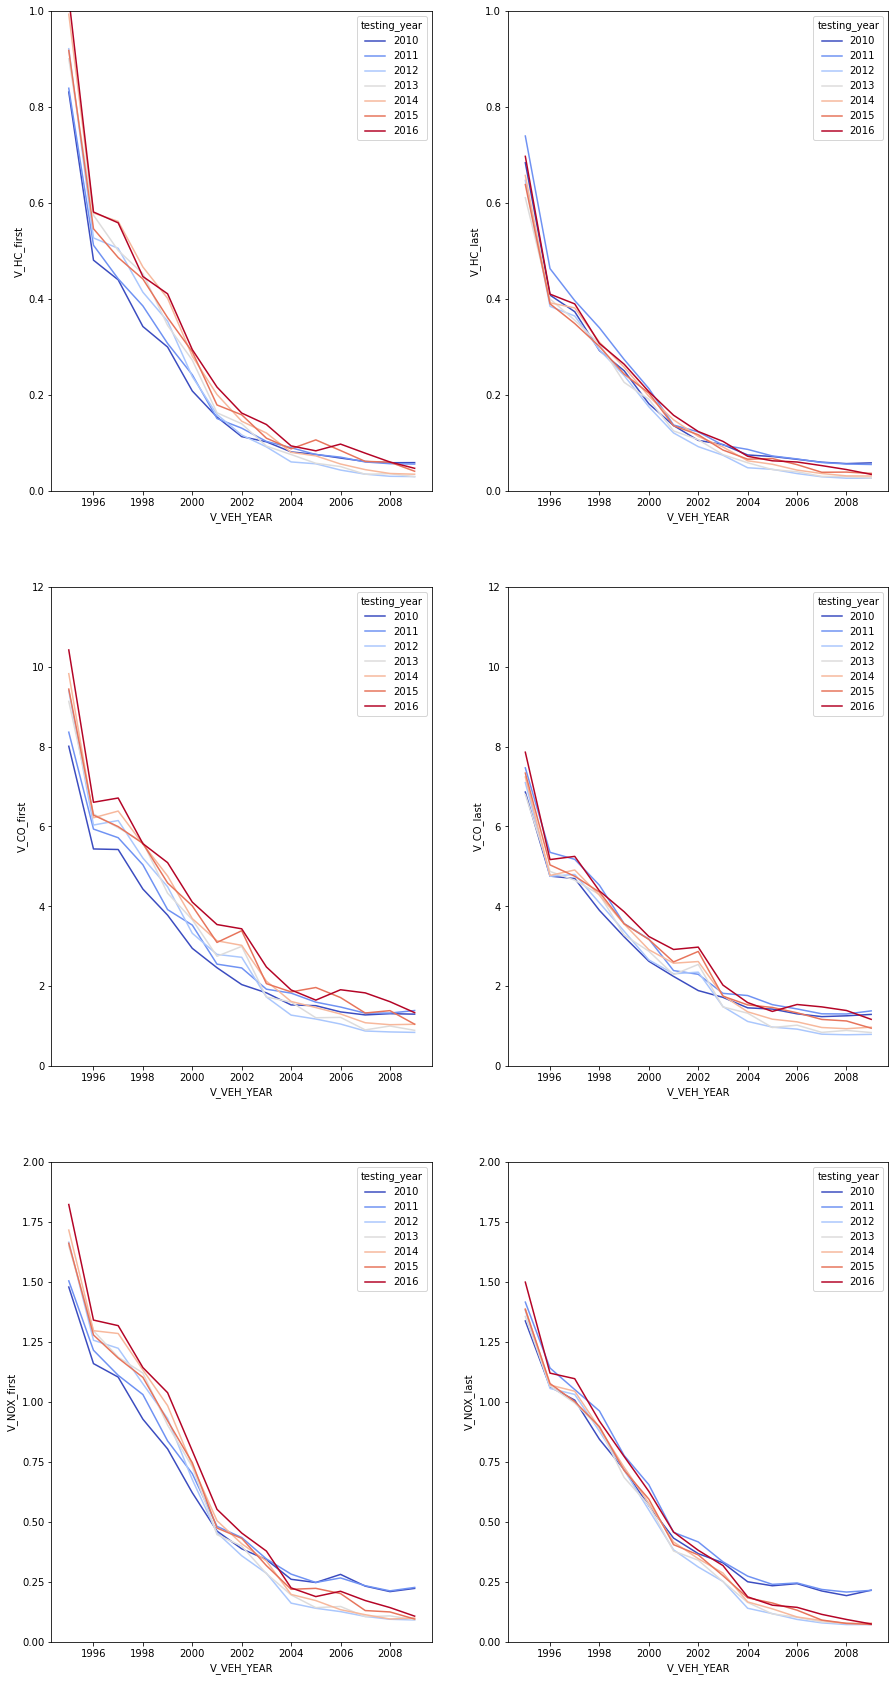

In [745]:
fig, ax = plt.subplots(3,2,figsize=(15, 30), facecolor="white")
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_first', hue="testing_year", palette="coolwarm",ax=ax[0][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_last', hue="testing_year", palette="coolwarm",ax=ax[0][1])
ax[0][0].set_ylim(0,1)
ax[0][1].set_ylim(0,1)

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_first', hue="testing_year", palette="coolwarm",ax=ax[1][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_last', hue="testing_year", palette="coolwarm",ax=ax[1][1])
ax[1][0].set_ylim(0,12)
ax[1][1].set_ylim(0,12)

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_first', hue="testing_year", palette="coolwarm",ax=ax[2][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_last', hue="testing_year", palette="coolwarm",ax=ax[2][1])
ax[2][0].set_ylim(0,2)
ax[2][1].set_ylim(0,2)

plt.savefig('V_VEH_YEAR_first_last_mean_comparisons.png')



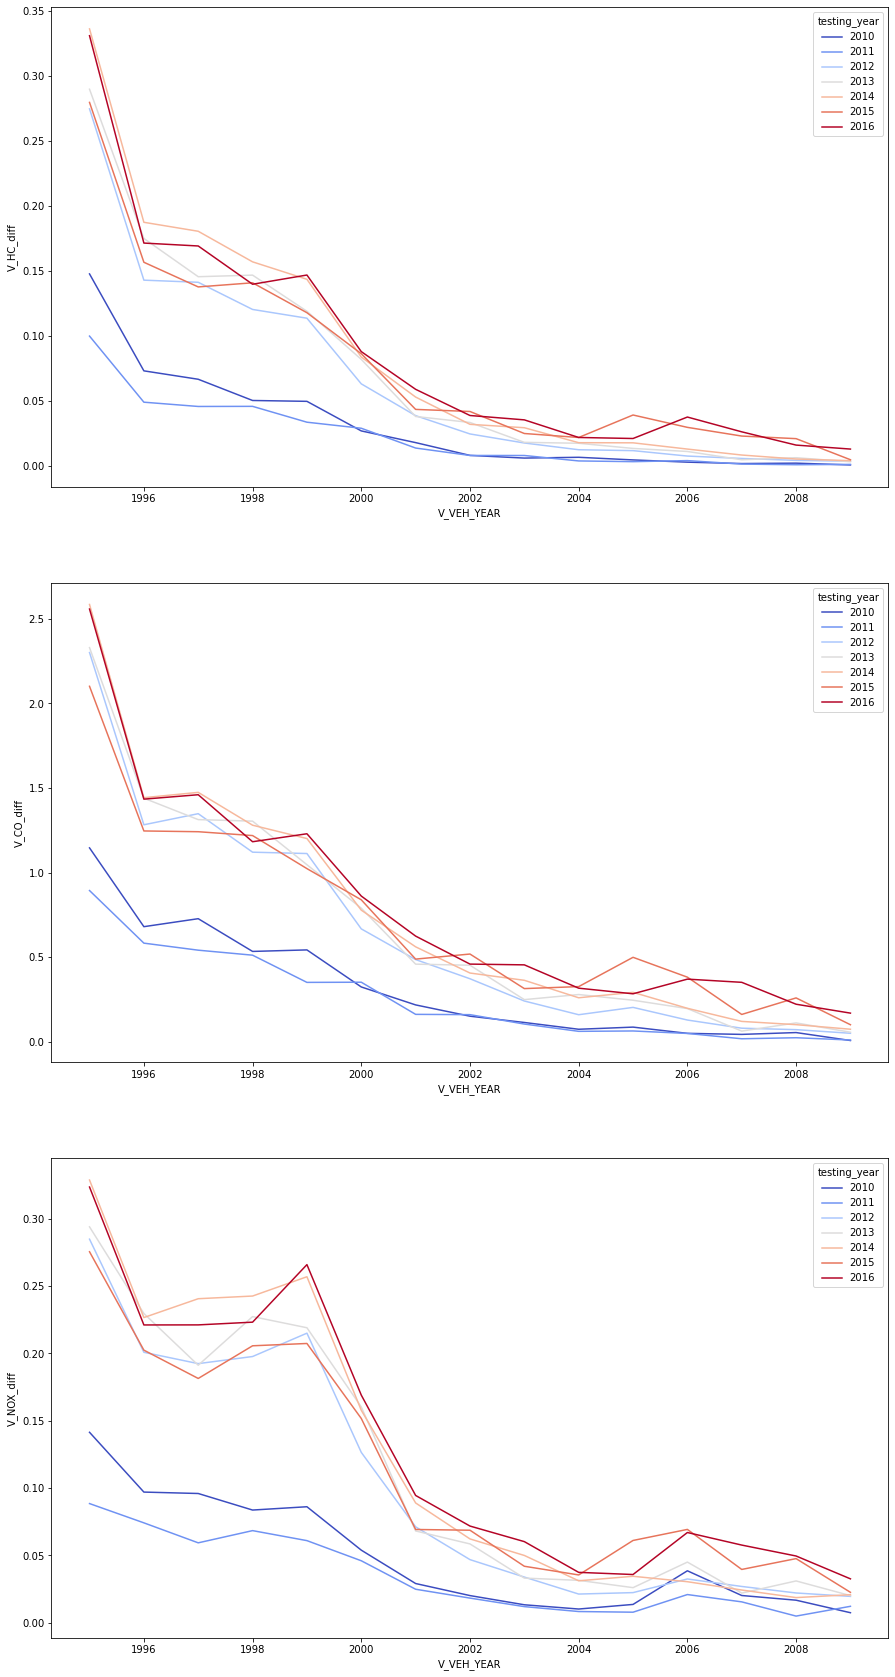

In [746]:
fig, ax = plt.subplots(3,1,figsize=(15, 30), facecolor="white")
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_diff', hue="testing_year", palette="coolwarm",ax=ax[0])
# ax[0][0].set_ylim(0,1)
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_diff', hue="testing_year", palette="coolwarm",ax=ax[1])

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_diff', hue="testing_year", palette="coolwarm",ax=ax[2])


# plt.setp(ax, ylim=[0,10])

plt.savefig('V_VEH_YEAR_first_last_year_diffs.png')



## ----Pollutants Saved----

In [5]:
def first_last_test(df,test_year):
    df["V_DATE_TIME"]=pd.to_datetime(df["V_DATE_TIME"]) 
    first_tests_df = df.drop_duplicates(subset=["V_VIN"], keep="first")
    last_tests_df = df.drop_duplicates(subset=["V_VIN"], keep="last")
    
    first_tests_df=first_tests_df[['V_VIN', 'V_DATE_TIME','V_MAKE', 'V_MODEL', 'V_CO_STD','V_NOX_STD','V_HC_STD','V_VEH_YEAR', 'V_ODOMETER', 'V_CO', 'V_HC','V_NOX', 'V_EM_RES']]
    last_tests_df=last_tests_df[['V_VIN', 'V_DATE_TIME','V_ODOMETER', 'V_CO', 'V_HC','V_NOX', 'V_EM_RES']]
    
    first_tests_df.rename(columns={"V_CO": "V_CO_first", "V_HC": "V_HC_first","V_NOX": "V_NOX_first","V_DATE_TIME": "V_DATE_TIME_first", "V_ODOMETER":"V_ODOMETER_first", "V_EM_RES":"V_EM_RES_first"}, inplace=True)
    last_tests_df.rename(columns={"V_CO": "V_CO_last", "V_HC": "V_HC_last","V_NOX": "V_NOX_last","V_DATE_TIME": "V_DATE_TIME_last", "V_ODOMETER":"V_ODOMETER_last", "V_EM_RES":"V_EM_RES_last"}, inplace=True)
    
    merged_df=first_tests_df.merge(last_tests_df,left_on="V_VIN", right_on="V_VIN")
    merged_df["testing_year"]=test_year
    merged_df["date_time_year"]=merged_df["V_DATE_TIME_first"].dt.year
    merged_df = merged_df[(merged_df['V_EM_RES_first']==0)&(merged_df["date_time_year"]!=merged_df["V_VEH_YEAR"])]
    merged_df["avg_miles_travelled"] = merged_df["V_ODOMETER_first"]/(merged_df["date_time_year"]-merged_df["V_VEH_YEAR"])
    
    final_HC_df = merged_df[merged_df["V_HC_first"]>=merged_df["V_HC_STD"]]
    final_HC_df["Theoretical HC Saved (tonnes)"]=((final_HC_df["V_HC_first"]-final_HC_df["V_HC_STD"])*final_HC_df["avg_miles_travelled"])/907185
    final_HC_df=final_HC_df.groupby(by="testing_year").agg({"Theoretical HC Saved (tonnes)":"sum"})
    
    final_NOX_df = merged_df[merged_df["V_NOX_first"]>=merged_df["V_NOX_STD"]]
    final_NOX_df["Theoretical NOX Saved (tonnes)"]=((final_NOX_df["V_NOX_first"]-final_NOX_df["V_NOX_STD"])*final_NOX_df["avg_miles_travelled"])/907185
    final_NOX_df=final_NOX_df.groupby(by="testing_year").agg({"Theoretical NOX Saved (tonnes)":"sum"})
    
    final_CO_df = merged_df[merged_df["V_CO_first"]>=merged_df["V_CO_STD"]]
    final_CO_df["Theoretical CO Saved (tonnes)"]=((final_CO_df["V_CO_first"]-final_CO_df["V_CO_STD"])*final_CO_df["avg_miles_travelled"])/907185
    final_CO_df=final_CO_df.groupby(by="testing_year").agg({"Theoretical CO Saved (tonnes)":"sum"})

    final = final_HC_df.merge(final_CO_df, left_on="testing_year",right_on="testing_year").merge(final_NOX_df, left_on="testing_year",right_on="testing_year")
    
    return final

In [ ]:
theoretical_pollutants_saved_df_2010 = first_last_test(Data_2010_IM240_clean,2010)
theoretical_pollutants_saved_df_2011 = first_last_test(Data_2011_IM240_clean,2011)
theoretical_pollutants_saved_df_2012 = first_last_test(Data_2012_IM240_clean,2012)
theoretical_pollutants_saved_df_2013 = first_last_test(Data_2013_IM240_clean,2013)
theoretical_pollutants_saved_df_2014 = first_last_test(Data_2014_IM240_clean,2014)
theoretical_pollutants_saved_df_2015 = first_last_test(Data_2015_IM240_clean,2015)
theoretical_pollutants_saved_df_2016 = first_last_test(Data_2016_IM240_clean,2016)

In [7]:
theoretical_pollutants_dfs=[theoretical_pollutants_saved_df_2010,theoretical_pollutants_saved_df_2011,theoretical_pollutants_saved_df_2012,theoretical_pollutants_saved_df_2013,theoretical_pollutants_saved_df_2014,theoretical_pollutants_saved_df_2015,theoretical_pollutants_saved_df_2016]
theoretical_pollutants_dfs_merged=pd.concat(theoretical_pollutants_dfs)

|Testing Year	|Theoretical HC Saved (tonnes)|	Theoretical CO Saved (tonnes)|	Theoretical NOX Saved (tonnes)|
|---|---|---|---|	
|2010|	360|	3970|	350|
|2011|	291|	3674|	278|
|2012|	609|	6816|	666|
|2013|	569|	6316|	663|
|2014|	538|	5799|	625|
|2015|	424|	4734|	451|
|2016|	399|	4465|	466|


## Future Work
- OBD and IM240 confusion/impact
- paired t test for mean difference first/last test
- mini vin analysis